In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [70]:
filename = '../gamora_nebula.jpg'
im = cv2.imread(filename)

In [71]:
#redimensiona a imagem
new_width = int(im.shape[1] * .5)
new_height = int(im.shape[0] * .5)
dim = (new_width, new_height)
im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)

(<Axes: >, <matplotlib.image.AxesImage at 0x1d72964d640>)

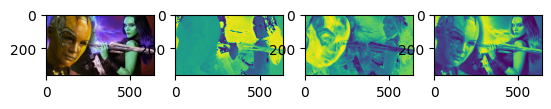

In [72]:
im_hsv = cv2.cvtColor(im_resized, cv2.COLOR_BGR2HSV)

im_r,im_g,im_b = cv2.split(im_hsv)
# im_r = im_hsv[:,:,0]
# im_g = im_hsv[:,:,1]
# im_b = im_hsv[:,:,2]

plt.subplot(1,4,1),plt.imshow(im_resized)
plt.subplot(1,4,2),plt.imshow(im_r)
plt.subplot(1,4,3),plt.imshow(im_g)
plt.subplot(1,4,4),plt.imshow(im_b)



In [73]:
# Definir os intervalos de cores em BGR (blue green red)
blue_interval = ([100, 0, 0], [255, 50, 50])  # valores BGR para azul
green_interval = ([0, 100, 0], [50, 255, 50])  # valores BGR para verde

# plt.subplot(1,2,1),plt.imshow(blue_interval)
# plt.subplot(1,2,2),plt.imshow(green_interval)
# plt.show()



In [79]:
# Criar máscaras para cada cor
def getMasks(img, first_interval, second_interval):
    blue_mask = cv2.inRange(img, np.array(first_interval[0]), np.array(first_interval[1]))
    green_mask = cv2.inRange(img, np.array(second_interval[0]), np.array(second_interval[1]))
    return blue_mask, green_mask

In [81]:
blue_mask, green_mask = getMasks(im, blue_interval, green_interval)
# Trocar as cores
im_hsv[blue_mask > 0] = (0, 255, 0)  # trocar azul por verde
im_hsv[green_mask > 0] = (255, 0, 0)  # trocar verde por azul


IndexError: boolean index did not match indexed array along dimension 0; dimension is 360 but corresponding boolean dimension is 720

In [68]:
im_change_hsv = cv2.cvtColor(im_hsv, cv2.COLOR_BGR2HSV)


(<Axes: >, <matplotlib.image.AxesImage at 0x1d727a34320>)

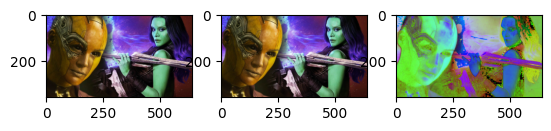

In [69]:
plt.subplot(1,3,1),plt.imshow(im_resized)
plt.subplot(1,3,2),plt.imshow(im_hsv)
plt.subplot(1,3,3),plt.imshow(im_change_hsv)


In [1]:
from CV_UT import ColorPicker

# Uso
picker = ColorPicker('../gamora_nebula.jpg')
picker.start()